In [2]:
import scipy.integrate as integrate 
import math
from matplotlib import cm
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import scipy.integrate as integrate 
import cmath 
from scipy import optimize
from scipy.misc import derivative
from decimal import Decimal
from decimal import *

getcontext().prec = 64


<function matplotlib.pyplot.show(close=None, block=None)>

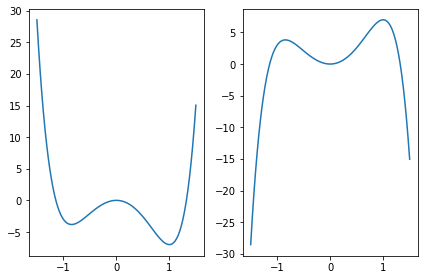

In [3]:
#test fucntion for an asymmmetric double well potential
def V(x):
    a = -10
    b = 2
    c = 2
    d = 3
    
    V =  a*x**2 - b*x**3 + c*x**4 + d*x**6
    return V

vec_V = np.vectorize(V)

x = np.linspace(-1.5, 1.5, 100)

plt.subplot(1,2,1)
plt.plot(x, V(x))

plt.subplot(1,2,2)
plt.plot(x, -V(x))

plt.tight_layout()
plt.show

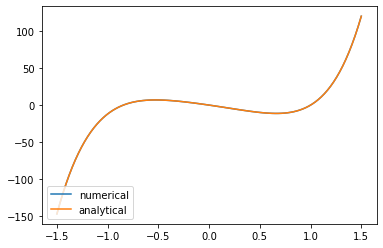

In [4]:
def v_p(x):
    return derivative(V, x, dx = 0.001, order = 21)


# V =  a*x**2 - b*x**3 + c*x**4 + d*x**6

def v_pa(x):
    a = -10
    b = 2
    c = 2
    d = 3
    
    return 2*a*x - 3*b*x**2 + 4*c*x**3 + 6*d*x**5

plt.plot(x,v_p(x), label='numerical')
plt.plot(x, v_pa(x), label='analytical')
plt.legend(loc = 'lower left')

<function matplotlib.pyplot.show(close=None, block=None)>

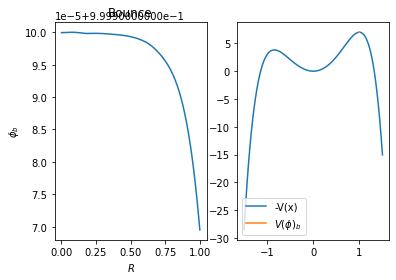

In [43]:
def f(t,y):    
    A = y[0]
    B = y[1]
    
    dA_dt = B
    dB_dt = v_p(A) - (2/t)*B

    return np.array([dA_dt, dB_dt])


t_span = np.array([0.001,1])
times = np.linspace(t_span[0], t_span[1], 200000)

#Chosing some initial value for t and having zero velocity at t = 0

y0 = np.array([0.99999994386679180724541993185994215309619903564453125, 0])

soln = solve_ivp(f, t_span, y0, t_eval = times)

t = soln.t; phi = soln.y[0]

plt.subplot(1,2,1)
plt.plot(t,phi)
plt.title('Bounce')
plt.ylabel('$\phi_b$')
plt.xlabel('$R$')

plt.subplot(1,2,2)
plt.plot(x, -V(x), label= '-V(x)')
plt.plot(phi, -V(phi), label='$V(\phi)_b$')
plt.legend(loc = 'lower left')

plt.tight_layout
plt.show

In [46]:
t_span = np.array([0.001,4])

times = np.linspace(t_span[0], t_span[1], 200000)

false_vac = optimize.fmin(V, 1.5)[0]
true_vac = optimize.fmin(V, -1.1)[0]


print('True vacuum is at', true_vac)

def over_undershoot(init_span, tol):
    
    init = Decimal(np.mean(init_span))
    y0 = np.array([init, 0])
    
    soln = solve_ivp(f, t_span, y0, method = 'DOP853', vectorized = True, t_eval = times)
    print(soln.message)   
    
    if soln.message == 'Required step size is less than spacing between numbers':
        print('Need more points')
        return soln.y[0], soln.t
    
    else:
        t = soln.t
        phi_b = soln.y[0]
    
        if np.abs(phi_b[-1] - true_vac) <= tol:
            print('Found it! y0 = %1.68f \n' % init)
            return phi_b, t
    
        elif phi_b[-1] < true_vac or phi_b[-1] > false_vac:
            #condition for rolling down to the right towards phi = +inf  
            #This means we are too far to the right of the false vacuum.
      
            print('y0 = %1.64f to +infinity and beyond!\n' % init)
            return over_undershoot([Decimal(init_span[0]), Decimal(init)], tol)
        else:                                     
            # this is condition for undershoot
            # need to look higher up in the interval for the correct initial value
        
            print('y0 = %1.64f results in undershoot'  % init)
            print('smallest value of the solution: %1.8f \n' % min(phi_b))
            return over_undershoot([Decimal(init), Decimal(init_span[1])],tol)
    
    
              
init_span = np.array([Decimal(0.75), Decimal(1)])    
tol = 1e-3

phi_b , t = over_undershoot(init_span,tol)


Optimization terminated successfully.
         Current function value: -7.000000
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: -3.821798
         Iterations: 14
         Function evaluations: 28
True vacuum is at -0.8456249999999994
The solver successfully reached the end of the integration interval.
y0 = 0.8750000000000000000000000000000000000000000000000000000000000000 results in undershoot
smallest value of the solution: -0.23814956 

The solver successfully reached the end of the integration interval.
y0 = 0.9375000000000000000000000000000000000000000000000000000000000000 results in undershoot
smallest value of the solution: -0.28566586 

The solver successfully reached the end of the integration interval.
y0 = 0.9687500000000000000000000000000000000000000000000000000000000000 results in undershoot
smallest value of the solution: -0.32798680 

The solver successfully reached the end of the integratio

-0.846132111575854


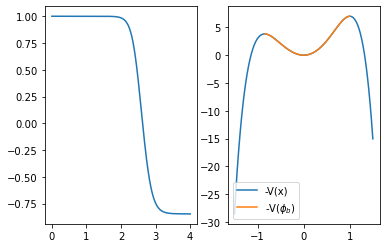

In [47]:
print(min(phi_b))

plt.subplot(1,2,1)
plt.plot(t, phi_b)

plt.subplot(1,2,2)
plt.plot( x, -V(x), label='-V(x)')
plt.plot(phi_b, -V(phi_b), label='-V($\phi_b$)')
plt.legend(loc = 'lower left')